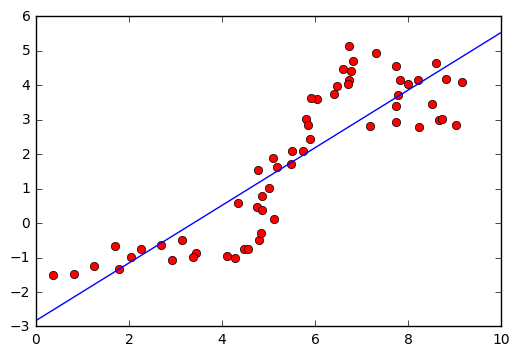

In [197]:
#Quetion 1
import mltools as ml
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file

X = data[:,0]
#print(X)
X = X[:,np.newaxis] # code expects shape (M,N) so make sure it's 2-dimensional
#print(X)
Y = data[:,1] # doesn't matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
plt.plot(Xtr,Ytr,'ro')
#plt.show()
lr = ml.linear.linearRegress( Xtr, Ytr ); # create and train model
xs = np.linspace(0,10,200); # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict( xs ); # make predictions at xs
plt.plot(xs,ys)
plt.show()


In [202]:
Ytehat = lr.predict( Xte);
Ytehat = np.squeeze(Ytehat);
Ytrhat = lr.predict( Xtr);
Ytrhat = np.squeeze(Ytrhat);
MSE_te = ((Ytehat - Yte) ** 2).mean(axis=None)
MSE_tr = ((Ytrhat - Ytr) ** 2).mean(axis=None)
print("MSE for testing : ",MSE_te)
print("MSE for training : ",MSE_tr)
print ("theta values :")
print(lr.theta)
print ("in plot theta 1(y-intercept) :", ys[0])
print ("in plot theta 2(slope):", ys[1]-ys[0])

MSE for testing :  2.24234920301
MSE for training :  1.12771195561
theta values :
[[-2.82765049  0.83606916]]
in plot theta 1(y-intercept) : [-2.82765049]
in plot theta 2(slope): [ 0.04201353]


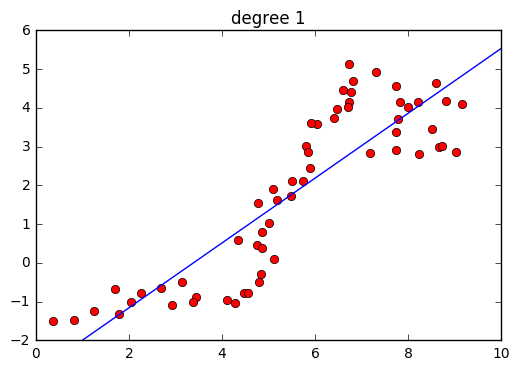

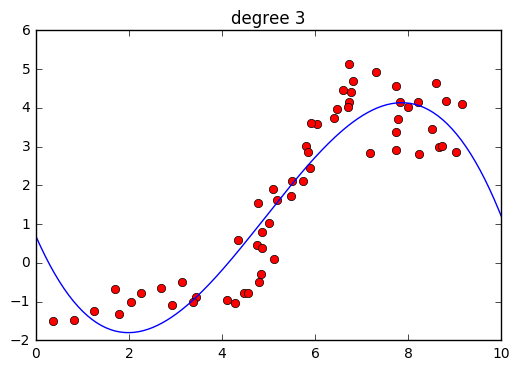

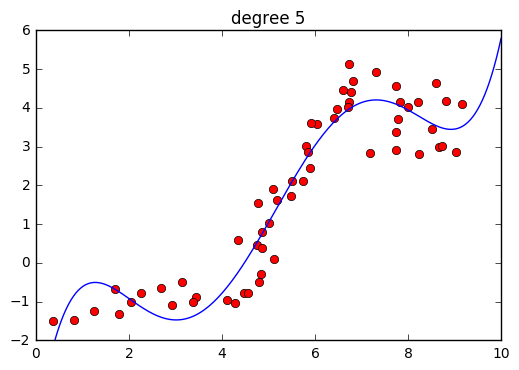

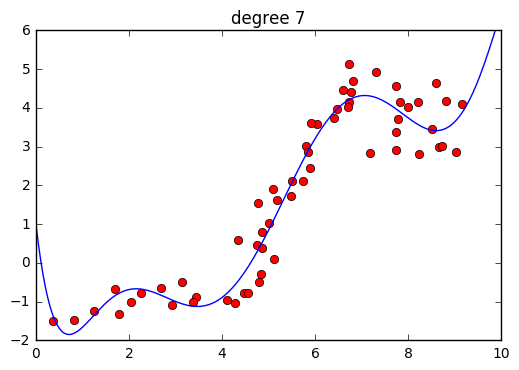

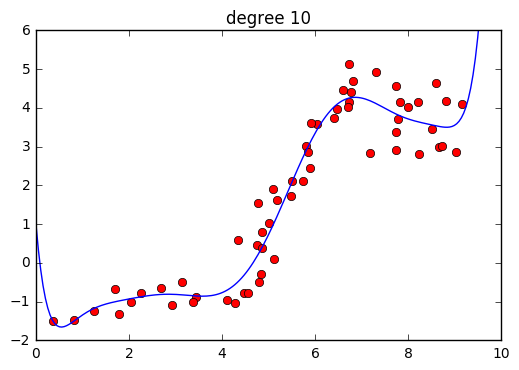

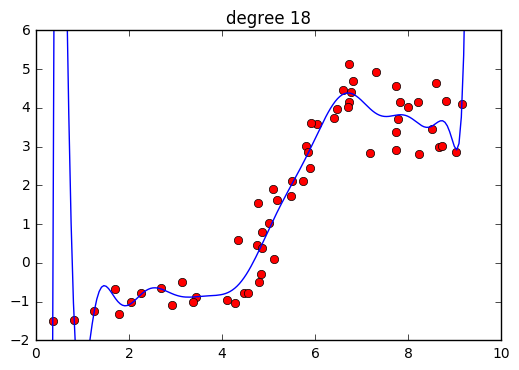

In [184]:
MSE_te = [0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ]
MSE_tr = [0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ]
K=[1,3,5,7,10,18];
for i,degree in enumerate(K):
    # Define a function "Phi(X)" which outputs the expanded and scaled feature matrix:
    Phi = lambda X: ml.transforms.rescale( ml.transforms.fpoly(X, degree,False), params)[0] 
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False); 
    XtrP,params = ml.transforms.rescale(XtrP);
    lr = ml.linear.linearRegress( XtrP, Ytr ); 
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params);
    Ytrhat = lr.predict( Phi(Xtr) ); # predict on training data
    Ytrhat = np.squeeze(Ytrhat);
    Ytehat = lr.predict( Phi(Xte) ); # predict on test data
    Ytehat = np.squeeze(Ytehat);
    MSE_te[i] = ((Ytehat - Yte) ** 2).mean(axis=None)
    MSE_tr[i] = ((Ytrhat - Ytr) ** 2).mean(axis=None)
    ys = lr.predict( Phi(xs) );
    plt.plot(Xtr,Ytr,'ro')
    ax = plt.axis()
    plt.plot(xs,ys)
    plt.axis(ax);
    plt.title("degree "+str(degree));
    plt.show()

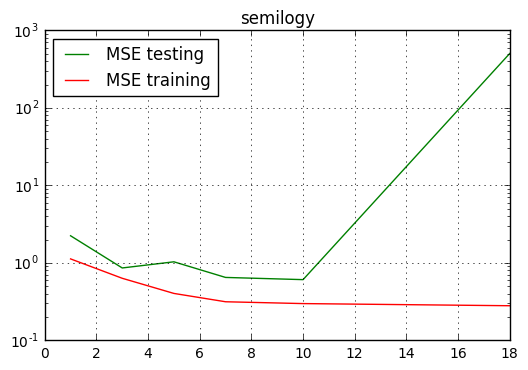

In [190]:
plt.semilogy(K,MSE_te,'g',label='MSE testing')
plt.semilogy(K,MSE_tr,'r',label='MSE training')
plt.title('semilogy')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()
#answer = 10

 degree 10 has minnimum error rate
 

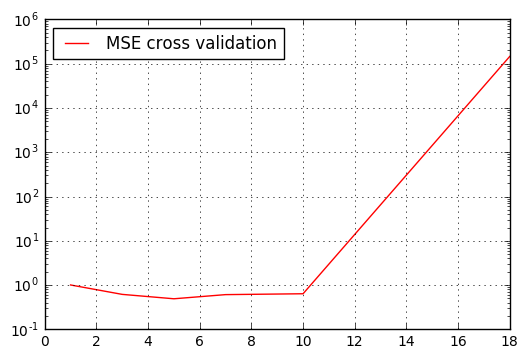

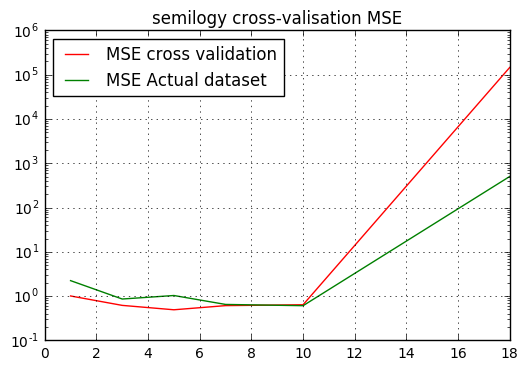

In [191]:
MSE_cv = [0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ]
J = [0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ]
for i,degree in enumerate(K):
    Phi = lambda X: ml.transforms.rescale( ml.transforms.fpoly(X, degree,False), params)[0]
    nFolds = 5;
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold); # take ith data block as validation
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False);
        # Rescasle the data matrix so that the features have similar ranges / variance
        XtiP,params = ml.transforms.rescale(XtiP);
        learner = ml.linear.linearRegress(XtiP,Yti);
        Yvihat = learner.predict( Phi(Xvi) ); # predict on valdaton data  
        Yvihat = np.squeeze(Yvihat);
        J[iFold] = ((Yvihat - Yvi) ** 2).mean(axis=None);
   
    # the overall estimated validation performance is the average of the performance on each fold
    MSE_cv[i] = np.mean(J)
plt.semilogy(K,MSE_cv,'r',label='MSE cross validation')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
plt.semilogy(K,MSE_cv,'r',label='MSE cross validation')
plt.semilogy(K,MSE_te,'g',label='MSE Actual dataset')
plt.title('semilogy cross-valisation MSE')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()



#degree 5 has minnimum cross validation error